In [1]:
"""This code takes the weighted topics and makes visualizations"""
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywaffle
import squarify
%matplotlib inline

In [2]:
df_media_ranks = pd.read_csv('trustmatrix.csv', header=0, index_col = 0)
df_media_ranks.head()

,trust,polarity,rank,cons_pol,lib_pol
wsj,4,1,3,1,-1
npr,5,4,1,-4,4
msnbc,1,1,0,-1,1
blaze,3,4,-1,4,-4
nyt,2,3,-1,-3,3


In [3]:
df_topics = pd.read_csv('topics-quantified_revised24.csv', header=0, index_col=0)
dftopics_code = pd.read_csv('topics_list_24_coded.csv', header=0)

#fill in missing papers
df_topics['paper'].fillna(method='ffill', inplace=True)

#find the average weight of each topic per paper
dfgrp=df_topics.groupby('paper').mean()
df_topics.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,paper,aid
0,0.042322,0.0,0.000000,0.015700,0.022909,0.171845,0.006615,0.058820,0.0,0.010476,...,0.000000,0.091198,0.007788,0.060155,0.0000,0.000000,0.000000,0.000000,wsj,wsj0
1,0.013435,0.0,0.000000,0.058396,0.020470,0.003034,0.003013,0.121036,0.0,0.013291,...,0.022429,0.000892,0.000000,0.007896,0.0168,0.234599,0.000000,0.000000,wsj,wsj1
2,0.000000,0.0,0.128812,0.075872,0.000000,0.000285,0.006531,0.035142,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.137781,0.000000,0.029078,wsj,wsj2
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.355963,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,wsj,wsj3
4,0.000000,0.0,0.000000,0.215865,0.000000,0.000966,0.000000,0.043644,0.0,0.000000,...,0.000000,0.011501,0.000000,0.000000,0.0000,0.023271,0.003242,0.040492,wsj,wsj4


In [4]:
#find the biggest topic for each paper
maxes=dfgrp.idxmax(axis=1)
#transpose that df
dft=dfgrp.T
dft['topicID']=list(range(0,24))


#join the topics to the dataframe
df=pd.merge(dft, dftopics_code, how='inner',on='topicID')
df.drop(['topicID'], axis=1, inplace=True)

In [5]:
outfile=open('alltopics-weights24.csv', 'w')
df.to_csv(outfile)

In [6]:
#average for each topic across all newspapers 
df['avg']=df.mean(axis=1)

In [7]:
df_ranked = df[['wsj', 'npr', 'msnbc', 'blaze',  'nyt', 'fox', 'breitbart', 'huffpo', 'nation', 'inforwars']].T
df_ranked = df_ranked.join(df_media_ranks)
df_ranked.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,trust,polarity,rank,cons_pol,lib_pol
wsj,0.018764,0.016044,0.017323,0.022898,0.008395,0.020229,0.024128,0.029344,0.014253,0.017492,...,0.012116,0.020465,0.015175,0.013747,0.020263,4,1,3,1,-1
npr,0.022512,0.021857,0.022378,0.020595,0.007340,0.013613,0.034797,0.033921,0.013282,0.013238,...,0.012887,0.021182,0.012306,0.011504,0.020529,5,4,1,-4,4
msnbc,0.019911,0.018661,0.020052,0.019917,0.007513,0.019621,0.020952,0.031085,0.018319,0.015013,...,0.014759,0.021094,0.013047,0.013363,0.020183,1,1,0,-1,1
blaze,0.022218,0.025569,0.028059,0.021424,0.006801,0.011692,0.026843,0.035847,0.018374,0.015021,...,0.013171,0.020104,0.013294,0.014824,0.024009,3,4,-1,4,-4
nyt,0.023306,0.024027,0.024178,0.018398,0.029092,0.013771,0.025385,0.035803,0.018060,0.013191,...,0.012557,0.019564,0.010672,0.014895,0.021344,2,3,-1,-3,3


In [8]:
mydict={}
n=0
with open('topickey.csv', 'r') as infile:
    reader = csv.reader(infile)
    for row in reader:
        mydict[n] = row[1]
        n+=1
df_ranked.rename(columns=mydict, inplace=True)
col_names = list(df_ranked.dtypes.index)[:24]

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


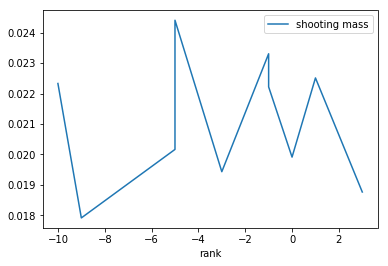

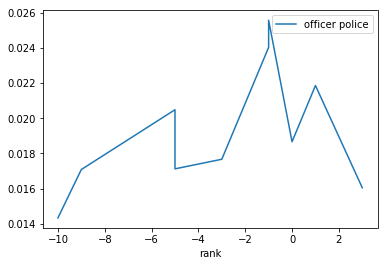

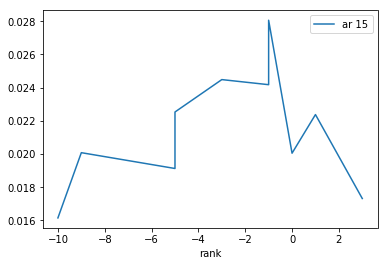

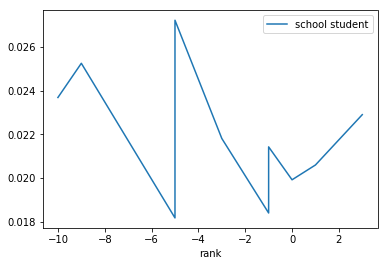

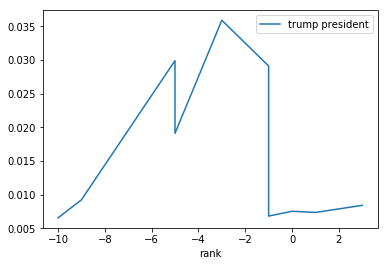

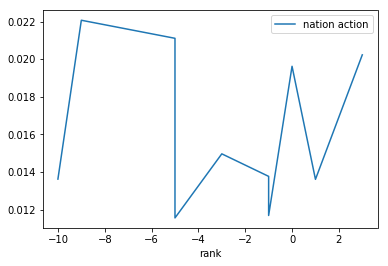

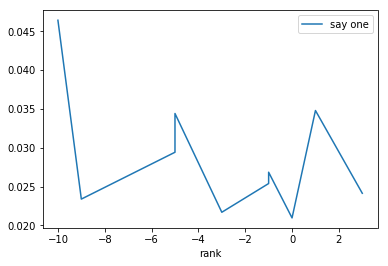

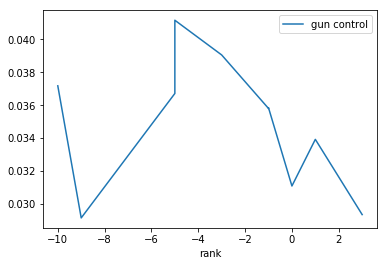

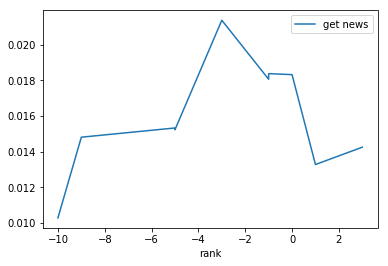

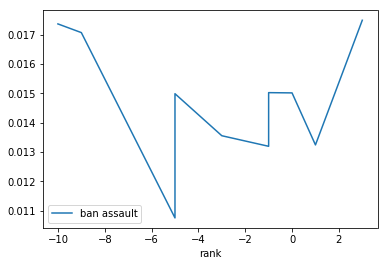

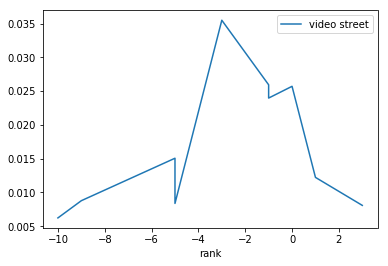

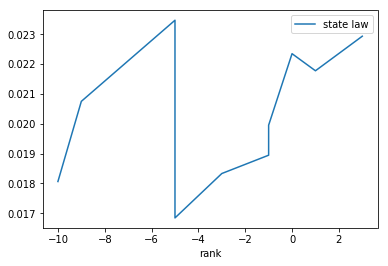

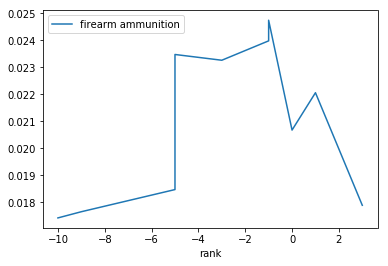

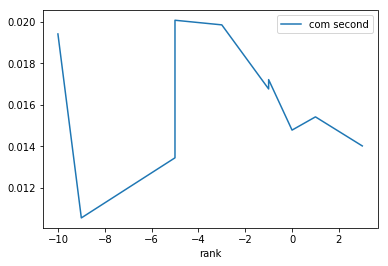

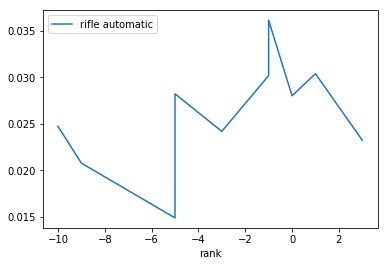

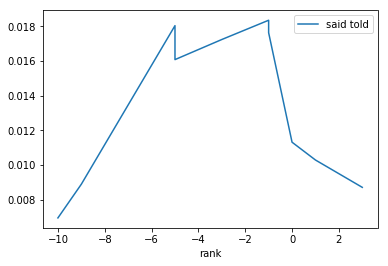

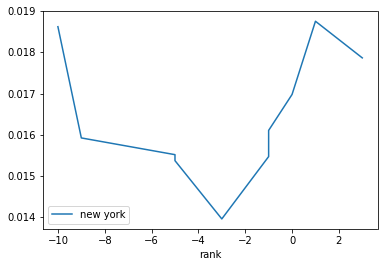

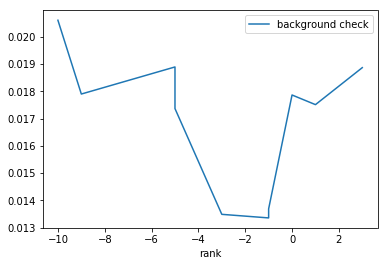

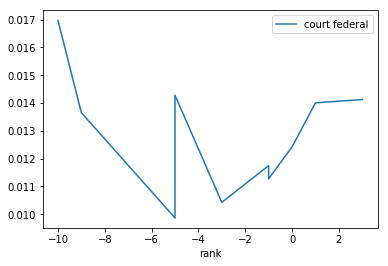

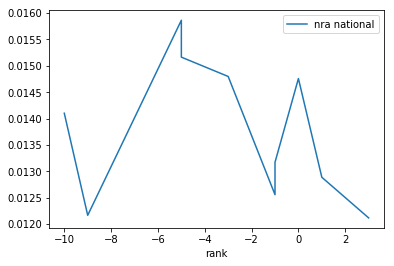

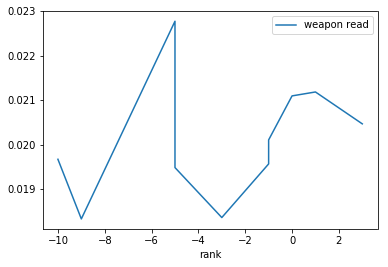

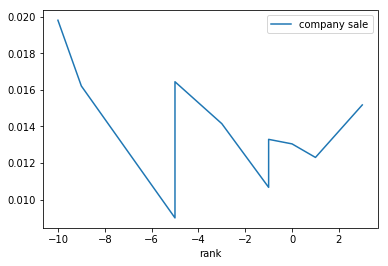

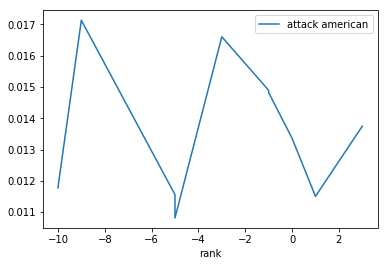

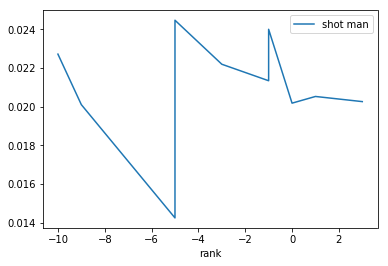

In [9]:
for col in col_names:
    df_ranked.plot(x = 'rank', y = col)

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


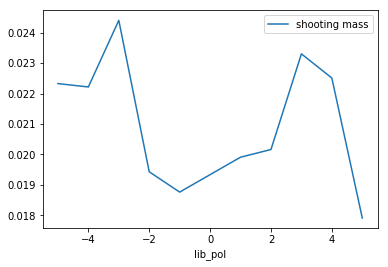

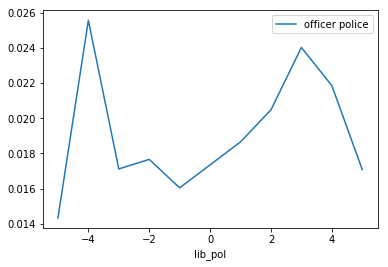

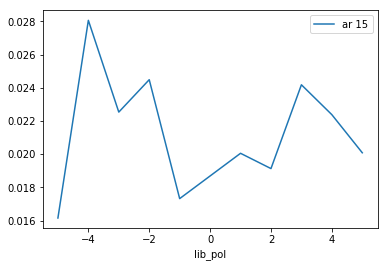

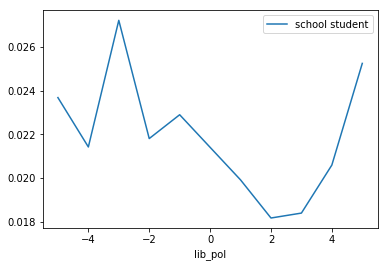

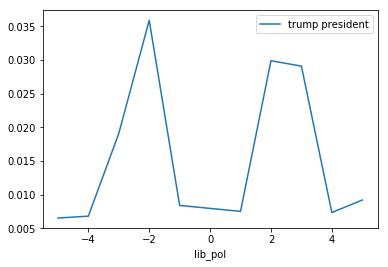

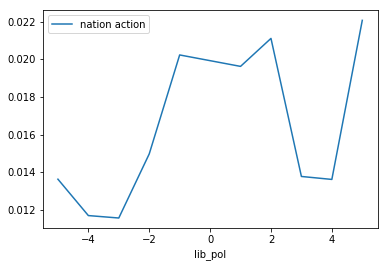

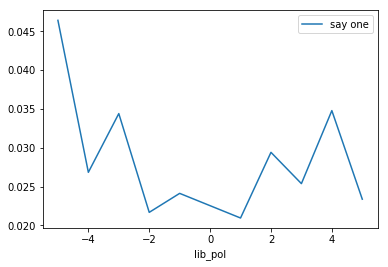

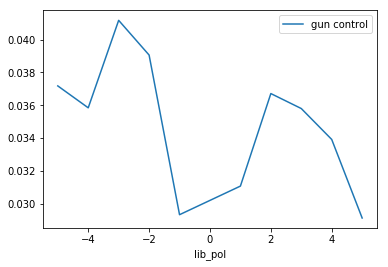

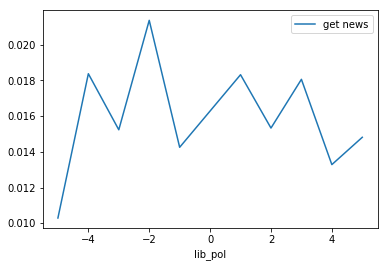

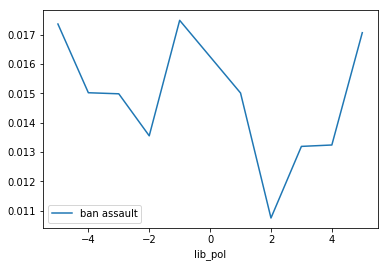

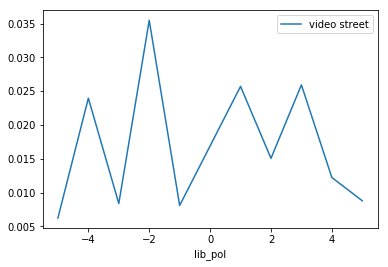

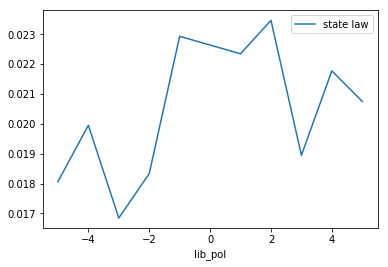

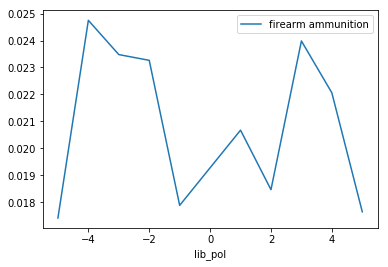

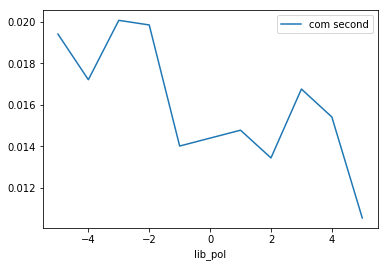

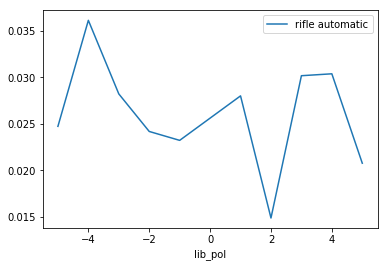

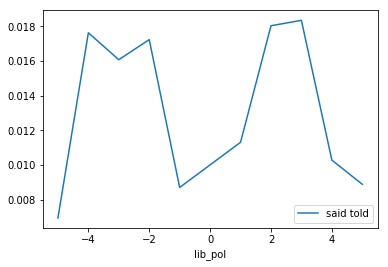

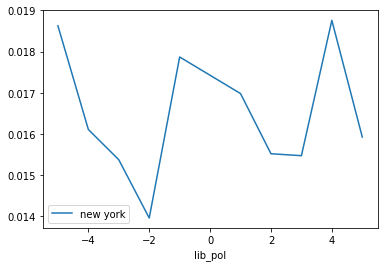

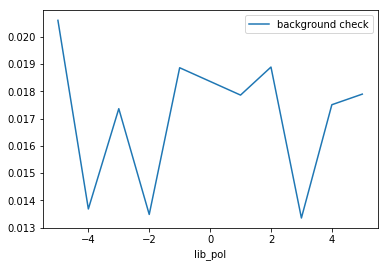

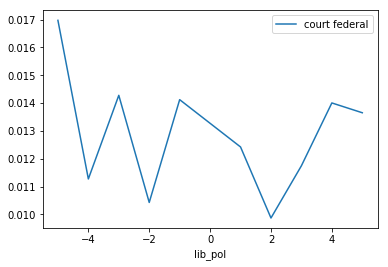

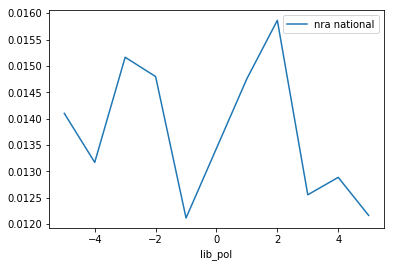

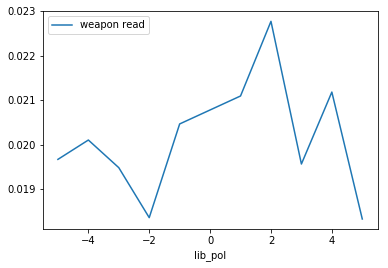

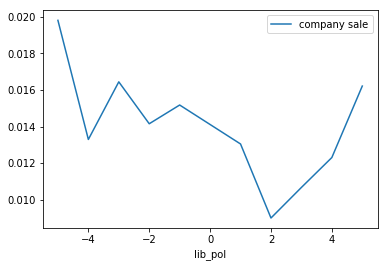

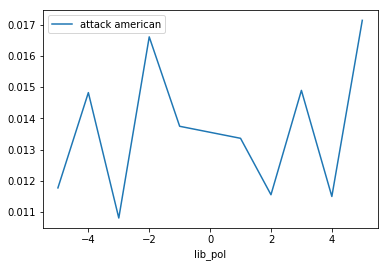

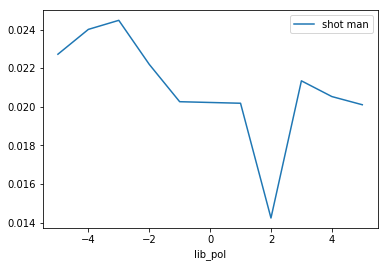

In [10]:
df_lib_sort = df_ranked.sort_values('lib_pol')
for col in col_names:
    df_lib_sort.plot(x = 'lib_pol', y = col)

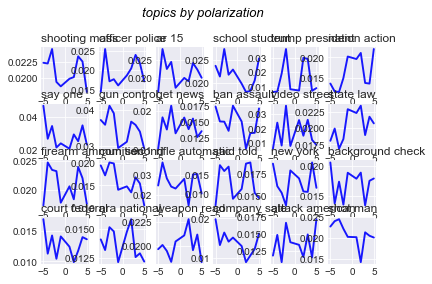

In [11]:
import seaborn as sns
plt.style.use('seaborn-darkgrid')
num = 0
for col in col_names:
    num+=1
    plt.subplot(4,6, num)
    
    plt.plot(df_lib_sort['lib_pol'], df_lib_sort[col], marker='', linewidth=1.9, alpha=0.9, label=col, color = 'blue')
    plt.title(col, loc='left', fontsize=12, fontweight=0 )

    
plt.suptitle("topics by polarization", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
plt.savefig('cons-to-lib-all.svg', dpi=1000)


In [ ]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=4, ncols=6, sharex=True, sharey=True, figsize=(18,10))
axes_list = [item for sublist in axes for item in sublist] 

# Now instead of looping through the groupby
# you CREATE the groupby
# you LOOP through the ordered names
# and you use .get_group to get the right group
grouped = df.head(3000).groupby("Country")

first_year = df['Year'].min()
last_year = df['Year'].max()

for countryname in ordered_country_names:
    selection = grouped.get_group(countryname)

    ax = axes_list.pop(0)
    selection.plot(x='Year', y='GDP_per_capita', label=countryname, ax=ax, legend=False)
    ax.set_title(countryname)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.25)
    ax.set_xlim((first_year, last_year))
    ax.set_xlabel("")
    ax.set_xticks((first_year, last_year))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    max_year = selection['Year'].max()
    gdp_value = float(selection[df['Year'] == max_year]['GDP_per_capita'])
    ax.set_ylim((0, 100000))
    ax.scatter(x=[max_year], y=[gdp_value], s=70, clip_on=False, linewidth=0)
    ax.annotate(str(int(gdp_value / 1000)) + "k", xy=[max_year, gdp_value], xytext=[7, -2], textcoords='offset points')

# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()
    
plt.tight_layout()
plt.subplots_adjust(hspace=1)

In [12]:
#calculate average for the liberal and conservative papers
df['lib']=(df['nyt']+ df['npr']+ df['huffpo']+ df['nation']+ df['msnbc'])/5
df['consv']=(df['fox'] +df['wsj']+ df['breitbart']+ df['inforwars']+ df['blaze'])/5
df['diff']=abs(df['lib']-df['consv'])


df=df[df['general'] != 'meta']
lib_df = df[['nyt', 'npr', 'huffpo', 'nation', 'msnbc', 'words10' ,'words2' ,'general' ,'specific', 'genspec', 'avg', 'lib']]
cons_df = df[['fox', 'wsj', 'breitbart', 'inforwars', 'blaze', 'words10' ,'words2' ,'general' ,'specific', 'genspec', 'avg', 'consv']]


In [13]:
#find totals for all the liberal outlets and all the conservative outlates
ltot=df['lib'].sum()
ctot = df['consv'].sum()
print(ltot, ctot)

0.3886809472228354 0.40124141760376525


In [14]:
general_grp=df.groupby('general', as_index=False).sum()
specific_grp=df.groupby('specific', as_index=False).sum()
gs_grp = df.groupby('genspec', as_index=False).sum()
specific_grp['diff_spec']=abs(specific_grp['lib']-specific_grp['consv'])
print(specific_grp.sort_values(by=['diff_spec']))


             specific     blaze  breitbart       fox    huffpo  inforwars  \
5          government  0.014824   0.010815  0.016605  0.011559   0.011778   
10                nyc  0.016108   0.015375  0.013961  0.015520   0.018624   
9                 nra  0.013171   0.015165  0.014799  0.015865   0.014101   
3     backgroundcheck  0.013687   0.017368  0.013486  0.018896   0.020611   
8   national identity  0.047539   0.052731  0.054025  0.057822   0.050805   
1               ar 15  0.028059   0.022534  0.024484  0.019132   0.016155   
0          ammunition  0.024748   0.023478  0.023265  0.018469   0.017418   
15              video  0.023973   0.008377  0.035492  0.015068   0.006234   
7       mass shooting  0.049578   0.041597  0.039863  0.034718   0.037052   
14              trump  0.006801   0.019096  0.035892  0.029891   0.006527   
2     assault weapons  0.056222   0.047704  0.042548  0.037668   0.044405   
4                bans  0.015021   0.014985  0.013552  0.010747   0.017366   

In [15]:
gen_lib_grp = lib_df.groupby('general', as_index=False).sum()
gen_cons_grp = cons_df.groupby('general', as_index=False).sum()
spec_lib_grp = lib_df.groupby('specific', as_index=False).sum()
spec_cons_grp = cons_df.groupby('specific', as_index=False).sum()
gs_lib_grp = lib_df.groupby('genspec', as_index=False).sum()
gs_cons_grp = cons_df.groupby('genspec', as_index=False).sum()

In [16]:
labels=general_grp['general']

g_lx={}
for k,v in zip(labels, gen_lib_grp['lib']):
    v=int((v*100)/ltot)
    g_lx[k]=v
    
g_cx={}
for k,v in zip(labels, gen_cons_grp['consv']):
    v=int((v*100)/ctot)
    g_cx[k]=v
    


In [17]:
labels=specific_grp['specific']
s_lx={}
for k,v in zip(labels, spec_lib_grp['lib']):
    v=int((v*100)/ltot)
    s_lx[k]=v
    
s_cx={}
for k,v in zip(labels, spec_cons_grp['consv']):
    v=int((v*100)/ctot)
    s_cx[k]=v
    
s_lx

{'ammunition': 5,
 'ar 15': 5,
 'assault weapons': 11,
 'backgroundcheck': 4,
 'bans': 3,
 'government': 3,
 'legal': 5,
 'mass shooting': 10,
 'national identity': 13,
 'nra': 3,
 'nyc': 4,
 'parkland': 10,
 'sales': 3,
 'second ammendment': 6,
 'trump': 4,
 'video': 4}

In [18]:
labels=gs_grp['genspec']
gs_lx={}
for k,v in zip(labels, gs_lib_grp['lib']):
    v=int((v*100)/ltot)
    gs_lx[k]=v
    
gs_cx={}
for k,v in zip(labels, gs_cons_grp['consv']):
    v=int((v*100)/ctot)
    gs_cx[k]=v
    
print(gs_lx)
print(gs_cx)


{'culture government': 3, 'culture national identity': 4, 'government trump': 4, 'gun control backgroundcheck': 4, 'gun control bans': 3, 'gun control legal': 5, 'gun control national identity': 8, 'gun control nra': 3, 'gun control second ammendment': 6, 'guns ammunition': 5, 'guns ar 15': 5, 'guns assault weapons': 11, 'guns sales': 3, 'incident mass shooting': 10, 'incident nyc': 4, 'incident parkland': 10, 'incident video': 4}
{'culture government': 3, 'culture national identity': 3, 'government trump': 3, 'gun control backgroundcheck': 4, 'gun control bans': 3, 'gun control legal': 4, 'gun control national identity': 9, 'gun control nra': 3, 'gun control second ammendment': 7, 'guns ammunition': 5, 'guns ar 15': 5, 'guns assault weapons': 11, 'guns sales': 3, 'incident mass shooting': 10, 'incident nyc': 4, 'incident parkland': 11, 'incident video': 4}


In [19]:
with open('gs_liberal.csv' , 'w') as csv_file:
    writer = csv.writer(csv_file)
    for k,v in gs_lx.items():
        writer.writerow([k,v])
with open('gs_convervative.csv' , 'w') as csv_file:
    writer = csv.writer(csv_file)
    for k,v in gs_cx.items():
        writer.writerow([k,v])

In [20]:
def makewaffles(mytallies, who, mytitle):
    fig=plt.figure(FigureClass=pywaffle.Waffle, rows=10, columns=10,values=mytallies, 
    title={'label':'Gun Control Topics in' + who + 'Media', 'loc':'left'},
    labels=["{0} ({1}%)".format(k,v) for k,v in mytallies.items()],
    legend={'loc':'best', 'bbox_to_anchor':(1.55,.6)})
    fig.savefig(mytitle+'grid.png')

In [33]:
def maketrees(polarity, polarity_dict, colors):
    myplot = squarify.plot(polarity_dict.values(), label = ["{0} ({1}%)".format(k,v) for k,v in polarity_dict.items()], 
              color=colors, alpha=.4)
    plt.axis('off')
    fig = myplot.get_figure()
    fig.savefig(polarity + 'treemap.png')

In [34]:
liberalcolors=["#08519c", "#3182bd" , "#6baed6" , "#9ecae1" , '#c6dbef',"#eff3ff", 'grey']
conservcolors=["#a50f15", "#de2d26", "#fb6a4a", "#fc9272", "#fcbba1", "#fee5d9"]

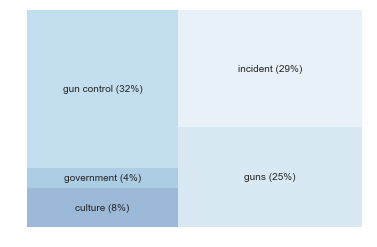

In [35]:
maketrees("Liberal",g_lx, liberalcolors)

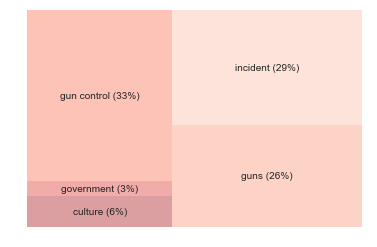

In [36]:
consTree = maketrees("Conservative", g_cx, conservcolors)

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


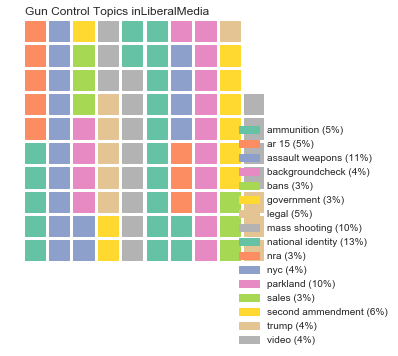

In [25]:
#plot the breakdown of topics in liberal outlets
makewaffles(s_lx, "Liberal", "libtopics")

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


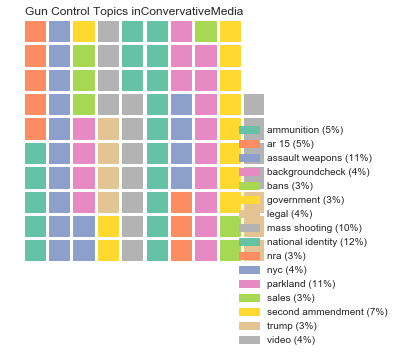

In [26]:
#plot the breakdown of topics in conservative outlets
makewaffles(s_cx, "Convervative", "constopics")

In [37]:
#What are the incident topics?
inlabel=df[df['general']=='incident']['specific']

In [38]:
incidentlx={}
for k,v in zip(inlabel, df['lib']):
    v=int((v*100)/ltot)
    incidentlx[k]=v
    
incidentcx={}
for k,v in zip(inlabel, df['consv']):
    v=int((v*100)/ltot)
    incidentcx[k]=v